This notebook is used to check if I need to run FCI or if it was already run on the populations

In [2]:
#imports!

# let's import things
import h5py as h5 
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')
import sys
import os
from scipy import stats
import seaborn as sns
import matplotlib as mpl

# Add the subdir to sys.path for our created scripts
sys.path.append('/home/jovyan/home/research_work/useful_py_scripts/')
sys.path.append('/home/jovyan/home/research_work/making_figures/paper_figures/')

# Now you can import the module
import useful_fncs
import figure_utils
import utils_from_others

# import for axes labels 
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif"
})

In [20]:
# let's first look at the NSNS_output

# the average_SF_mass_needed is Average_SF_mass_needed =  10892909.034667056

pathToH5_NSNS = '/home/jovyan/home/copied_files/N1e6_NSNS_Fid/COMPAS_Output_wWeights.h5'

Data_NSNS  = h5.File(pathToH5_NSNS, "r")

DCOs_NSNS = Data_NSNS['BSE_Double_Compact_Objects'] # getting the DCO objects

# gathering the double compact objects that we have computed rates for
DCO_mask_NSNS = Data_NSNS['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['DCOmask'][()]

# making sure we are rpesenting the true universe
mixture_weights_all = DCOs_NSNS['mixture_weight'][()]
mixture_weights = mixture_weights_all[DCO_mask_NSNS]

# times (these should be in Myr)
lifetimes_all = DCOs_NSNS['Time'][()]
lifetimes = lifetimes_all[DCO_mask_NSNS]

col_times_all = DCOs_NSNS['Coalescence_Time'][()]
col_times = col_times_all[DCO_mask_NSNS]

# this should hypothetically be the DCO systems that merge within a hubble time (since DCO mask was applied) 
delay_times = lifetimes + col_times



In [21]:
len(DCO_mask_NSNS)

366495

In [22]:
# let's plot the rate of the systems that merge within a hubble time

hubble_time = 13.9e3
condition_mergers = delay_times < hubble_time
mergers = np.sum(condition_mergers)

# mixture_weights_merged = mixture_weights[condition_mergers]

rates_DCO = Data_NSNS['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['merger_rate'][()]
rates_DCO_masked = rates_DCO[condition_mergers]

redshifts = Data_NSNS['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['redshifts'][()]


# selecting for NSNS
stellar_types_all_1 = DCOs_NSNS['Stellar_Type(1)'][()]
stellar_types_1 = stellar_types_all_1[DCO_mask_NSNS]
stellar_types_1_merged = stellar_types_1[condition_mergers]

stellar_types_all_2 = DCOs_NSNS['Stellar_Type(2)'][()]
stellar_types_2 = stellar_types_all_2[DCO_mask_NSNS]
stellar_types_2_merged = stellar_types_2[condition_mergers]

NSNS_systems_bool = np.logical_and(stellar_types_1_merged==13, stellar_types_2_merged==13)
NSNS_rate = np.sum(rates_DCO_masked[NSNS_systems_bool], axis=0)

In [23]:
# let's now do this for the WDWD systems 

HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool = useful_fncs.WD_BINARY_BOOLS(stellar_types_1_merged, stellar_types_2_merged)
carbon_oxygen_bool = np.logical_or(ONeCOWD_bool,np.logical_or(COONeWD_bool,np.logical_or(COHeWD_bool,np.logical_or(COWD_bool,HeCOWD_bool))))

cowd_rate = np.sum(rates_DCO_masked[carbon_oxygen_bool], axis=0)


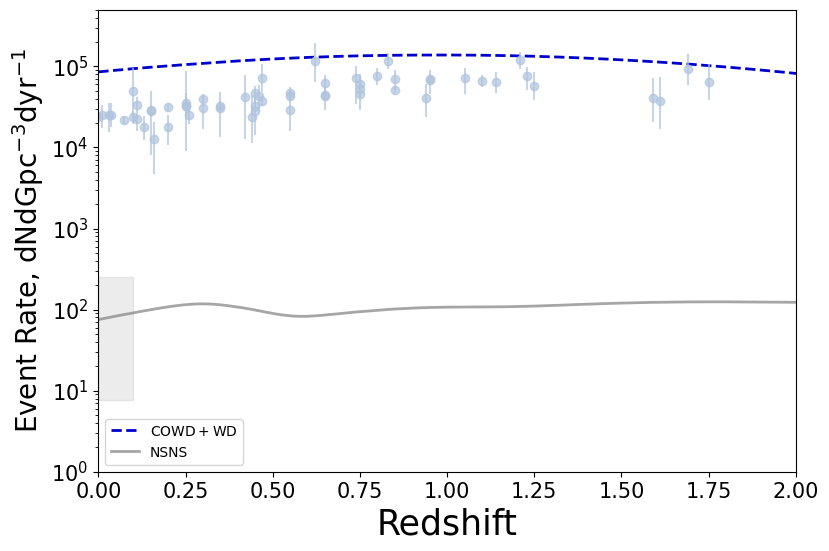

In [24]:
h_little = 0.6766

redshifts_briel = [
    0, 0.01, 0.03, (0.025+0.050)/2, 0.073, (0.05+0.15)/2, (0.075+0.125)/2, 0.11, 0.11, 0.13, 
    0.15, (0.125+0.175)/2, 0.16, (0.175+0.225)/2, 0.2, 0.25, (0.15+0.35)/2, (0.225+0.275)/2, 
    0.26, 0.3, (0.275+0.325)/2, 0.35, 0.35, 0.42, 0.44, 0.45, 0.45, (0.35+0.55)/2, 0.46, 0.47, 
    0.47, 0.55, 0.55, 0.55, 0.62, 0.65, (0.55+0.75)/2, 0.65, 0.74, 0.75, 0.75, 0.75, 0.8, 0.83, 0.85, 
    0.85, 0.94, 0.95, 0.95, 1.05, 1.1, 1.14, 1.21, 1.23, 1.25, 1.59, 1.61, 1.69, 1.75, 2.25
]

rates_briel = [
    0.77, 0.82, 0.82, 0.81, 0.71, 1.60, 0.76, 1.08, 0.72, 0.58, 0.93, 0.90, 0.41, 1.01, 0.58,
    1.05, 1.14, 1.06, 0.82, 0.99, 1.27, 0.99, 1.05, 1.34, 0.76, 0.90, 1.05, 1.52, 1.40, 1.22, 
    2.33, 0.93, 1.40, 1.52, 3.76, 1.40, 2.01, 1.43, 2.30, 1.49, 1.98, 1.69, 2.45, 3.79, 2.27, 
    1.66, 1.31, 2.22, 2.24, 2.30, 2.16, 2.06, 3.85, 2.45, 1.87, 1.31, 1.22, 2.97, 2.10, 1.43
]

# converting the rates to the correct units
rates_briel = np.array(rates_briel)
converted_rates_briel = (rates_briel*(10**5))*(h_little**3)

## uncertainties
lower_limits = [
    -0.10, -0.26, -0.32, -0.24, -0.08, -0.85, -0.13, -0.29, -0.20, -0.18, -0.67, -0.10, -0.26, -0.09, 
    -0.23, -0.76, -0.35, -0.08, -0.20, -0.44, -0.10, -0.55, -0.17, -0.93, -0.39, -0.44, -0.17, -0.38, 
    -0.50, -0.17, -0.79, -0.41, -0.17, -0.26, -1.66, -0.15, -0.52, -0.50, -1.20, -0.55, -0.61, -0.17, 
    -0.54, -0.79, -0.64, -0.15, -0.55, -0.73, -0.23, -0.82, -0.35, -0.53, -0.85, -0.82, -0.64, -0.64, 
    -0.67, -1.08, -0.87, -1.11
]

lower_limits = np.array(lower_limits)
converted_lower_limits = (lower_limits*(10**5)*(h_little**3))

upper_limits = [
    0.10, 0.26, 0.32, 0.33, 0.08, 1.46, 0.15, 0.29, 0.08, 0.20, 0.67, 0.11, 0.26, 0.09, 0.23,
    1.75, 0.38, 0.09, 0.20, 0.47, 0.11, 0.55, 0.17, 1.22, 0.67, 0.44, 0.17, 0.32, 0.50, 0.17, 
    1.08, 0.41, 0.17, 0.29, 2.57, 0.15, 0.55, 0.50, 0.96, 0.79, 0.61, 0.17, 0.67, 0.96, 0.64, 
    0.15, 0.64, 0.73, 0.23, 0.82, 0.35, 0.70, 1.05, 0.73, 0.90, 0.99, 1.14, 1.57, 1.31, 2.77
]

upper_limits = np.array(upper_limits)
converted_upper_limits = (upper_limits*(10**5)*(h_little**3))

# multiplied the lower errors by -1 so make them positive to avoid the plt.errorbar error 
y_error = [-1*(converted_lower_limits), converted_upper_limits]


#Let's now actually plot!
plt.figure(figsize=(9,6))
plt.plot(redshifts,cowd_rate,linewidth=2,linestyle='--',color='mediumblue',label=r'$\mathrm{COWD + WD}$') # all COWD

# NSNS Rate
plt.plot(redshifts,NSNS_rate,linewidth=2,color='grey',alpha=0.7,label='NSNS')

## LVK BNS rate (update at z=0 - https://arxiv.org/pdf/2508.18083)
plt.fill_between([0,0.1], 
                7.6,
                250, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')



## seeing if this plot matches Max Briel's paper
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error, fmt='o', color = 'lightsteelblue', alpha=0.7)#,label='Briel et al. 2020')


## axis
plt.xlim(0,2)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Event Rate, $\mathrm{dNdGpc^{-3}dyr^{-1}}$",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(title, pad=20)
plt.legend()


In [25]:
# let's look at our number statitics!
print(sum(carbon_oxygen_bool))
print(sum(NSNS_systems_bool))


33999
133


(array([14768.,     0., 28939.,     0.,     0.,   426.,     0.,   627.,
            0.,  5398.]),
 array([10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8, 13.2, 13.6, 14. ]),
 <BarContainer object of 10 artists>)

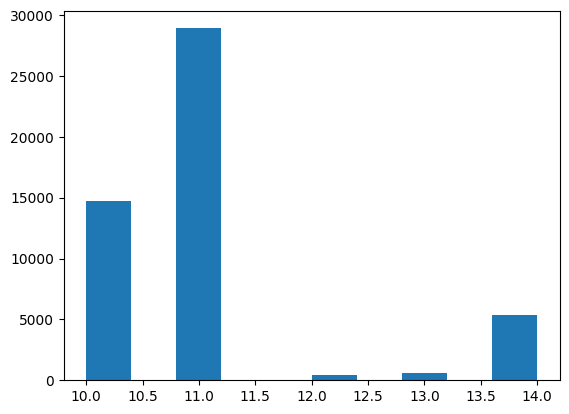

In [26]:
plt.hist(stellar_types_1_merged)

In [27]:
# let's compare all of this to what is already shown in FCI in the COMPAS output

pathToH5_NSNS_OG = '/home/jovyan/CompasOutput/v03.21.00/N1e6_MassiveWDWD_NSNS_fid/MainRun/COMPAS_Output_wWeights.h5'

Data_NSNS_OG  = h5.File(pathToH5_NSNS_OG, "r")

DCOs_NSNS_OG = Data_NSNS_OG['BSE_Double_Compact_Objects'] # getting the DCO objects

# gathering the double compact objects that we have computed rates for
DCO_mask_NSNS_OG = Data_NSNS_OG['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['DCOmask'][()]

# making sure we are rpesenting the true universe
mixture_weights_all_OG = DCOs_NSNS_OG['mixture_weight'][()]
mixture_weights_OG = mixture_weights_all_OG[DCO_mask_NSNS_OG]

# times (these should be in Myr)
lifetimes_all_OG = DCOs_NSNS_OG['Time'][()]
lifetimes_OG = lifetimes_all_OG[DCO_mask_NSNS_OG]

col_times_all_OG = DCOs_NSNS_OG['Coalescence_Time'][()]
col_times_OG = col_times_all_OG[DCO_mask_NSNS_OG]

# this should hypothetically be the DCO systems that merge within a hubble time (since DCO mask was applied) 
delay_times_OG = lifetimes_OG + col_times_OG



In [28]:
print(len(DCO_mask_NSNS_OG))
print(len(DCO_mask_NSNS))

704172
366495


The difference in these DCO masks already tell us that we need to run FCI on the outputs

Let's look at if the NSNS and WDWD rates match between different importance sampling decisions

In [29]:
# let's first look at the NSNS_output

# the average_SF_mass_needed is Average_SF_mass_needed =  10892909.034667056

pathToH5_WDWD = '/home/jovyan/home/copied_files/N1e6_MassiveWDWD_NSNS_fid/COMPAS_Output_wWeights.h5'

Data_WDWD  = h5.File(pathToH5_WDWD, "r")

DCOs_WDWD = Data_WDWD['BSE_Double_Compact_Objects'] # getting the DCO objects

# gathering the double compact objects that we have computed rates for
DCO_mask_WDWD = Data_WDWD['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['DCOmask'][()]

# # making sure we are rpesenting the true universe
# mixture_weights_all = DCOs_WDWD['mixture_weight'][()]
# mixture_weights = mixture_weights_all[DCO_mask_WDWD]

# times (these should be in Myr)
lifetimes_all_WDWD = DCOs_WDWD['Time'][()]
lifetimes_WDWD = lifetimes_all_WDWD[DCO_mask_WDWD]

col_times_all_WDWD = DCOs_WDWD['Coalescence_Time'][()]
col_times_WDWD = col_times_all_WDWD[DCO_mask_WDWD]

# this should hypothetically be the DCO systems that merge within a hubble time (since DCO mask was applied) 
delay_times_WDWD = lifetimes_WDWD + col_times_WDWD



In [30]:
# let's plot the rate of the systems that merge within a hubble time

hubble_time = 13.9e3
condition_mergers_WDWD = delay_times_WDWD < hubble_time

# mixture_weights_merged = mixture_weights[condition_mergers_WDWD]

rates_DCO_WDWD = Data_WDWD['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['merger_rate'][()]
rates_DCO_masked_WDWD = rates_DCO_WDWD[condition_mergers_WDWD]


In [31]:
redshifts = Data_WDWD['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048']['redshifts'][()]

In [32]:
# selecting for NSNS
stellar_types_all_1_WDWD = DCOs_WDWD['Stellar_Type(1)'][()]
stellar_types_1_WDWD = stellar_types_all_1_WDWD[DCO_mask_WDWD]
stellar_types_1_merged_WDWD = stellar_types_1_WDWD[condition_mergers_WDWD]

stellar_types_all_2_WDWD = DCOs_WDWD['Stellar_Type(2)'][()]
stellar_types_2_WDWD = stellar_types_all_2_WDWD[DCO_mask_WDWD]
stellar_types_2_merged_WDWD = stellar_types_2_WDWD[condition_mergers_WDWD]

NSNS_systems_bool_WDWD = np.logical_and(stellar_types_1_merged_WDWD==13, stellar_types_2_merged_WDWD==13)
NSNS_rate_WDWD = np.sum(rates_DCO_masked_WDWD[NSNS_systems_bool_WDWD], axis=0)

In [33]:
# let's now do this for the WDWD systems 

HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool = useful_fncs.WD_BINARY_BOOLS(stellar_types_1_merged_WDWD, stellar_types_2_merged_WDWD)
carbon_oxygen_bool_WDWD = np.logical_or(ONeCOWD_bool,np.logical_or(COONeWD_bool,np.logical_or(COHeWD_bool,np.logical_or(COWD_bool,HeCOWD_bool))))

cowd_rate_WDWD = np.sum(rates_DCO_masked_WDWD[carbon_oxygen_bool_WDWD], axis=0)


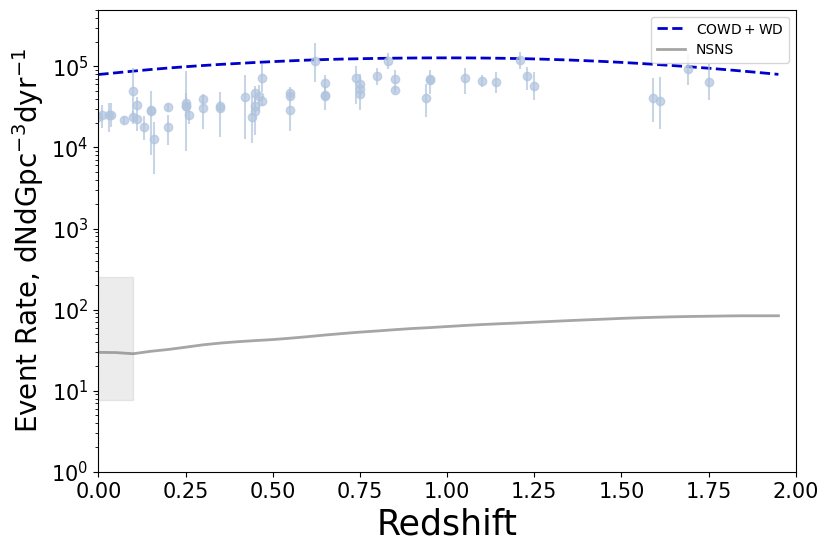

In [34]:
h_little = 0.6766

redshifts_briel = [
    0, 0.01, 0.03, (0.025+0.050)/2, 0.073, (0.05+0.15)/2, (0.075+0.125)/2, 0.11, 0.11, 0.13, 
    0.15, (0.125+0.175)/2, 0.16, (0.175+0.225)/2, 0.2, 0.25, (0.15+0.35)/2, (0.225+0.275)/2, 
    0.26, 0.3, (0.275+0.325)/2, 0.35, 0.35, 0.42, 0.44, 0.45, 0.45, (0.35+0.55)/2, 0.46, 0.47, 
    0.47, 0.55, 0.55, 0.55, 0.62, 0.65, (0.55+0.75)/2, 0.65, 0.74, 0.75, 0.75, 0.75, 0.8, 0.83, 0.85, 
    0.85, 0.94, 0.95, 0.95, 1.05, 1.1, 1.14, 1.21, 1.23, 1.25, 1.59, 1.61, 1.69, 1.75, 2.25
]

rates_briel = [
    0.77, 0.82, 0.82, 0.81, 0.71, 1.60, 0.76, 1.08, 0.72, 0.58, 0.93, 0.90, 0.41, 1.01, 0.58,
    1.05, 1.14, 1.06, 0.82, 0.99, 1.27, 0.99, 1.05, 1.34, 0.76, 0.90, 1.05, 1.52, 1.40, 1.22, 
    2.33, 0.93, 1.40, 1.52, 3.76, 1.40, 2.01, 1.43, 2.30, 1.49, 1.98, 1.69, 2.45, 3.79, 2.27, 
    1.66, 1.31, 2.22, 2.24, 2.30, 2.16, 2.06, 3.85, 2.45, 1.87, 1.31, 1.22, 2.97, 2.10, 1.43
]

# converting the rates to the correct units
rates_briel = np.array(rates_briel)
converted_rates_briel = (rates_briel*(10**5))*(h_little**3)

## uncertainties
lower_limits = [
    -0.10, -0.26, -0.32, -0.24, -0.08, -0.85, -0.13, -0.29, -0.20, -0.18, -0.67, -0.10, -0.26, -0.09, 
    -0.23, -0.76, -0.35, -0.08, -0.20, -0.44, -0.10, -0.55, -0.17, -0.93, -0.39, -0.44, -0.17, -0.38, 
    -0.50, -0.17, -0.79, -0.41, -0.17, -0.26, -1.66, -0.15, -0.52, -0.50, -1.20, -0.55, -0.61, -0.17, 
    -0.54, -0.79, -0.64, -0.15, -0.55, -0.73, -0.23, -0.82, -0.35, -0.53, -0.85, -0.82, -0.64, -0.64, 
    -0.67, -1.08, -0.87, -1.11
]

lower_limits = np.array(lower_limits)
converted_lower_limits = (lower_limits*(10**5)*(h_little**3))

upper_limits = [
    0.10, 0.26, 0.32, 0.33, 0.08, 1.46, 0.15, 0.29, 0.08, 0.20, 0.67, 0.11, 0.26, 0.09, 0.23,
    1.75, 0.38, 0.09, 0.20, 0.47, 0.11, 0.55, 0.17, 1.22, 0.67, 0.44, 0.17, 0.32, 0.50, 0.17, 
    1.08, 0.41, 0.17, 0.29, 2.57, 0.15, 0.55, 0.50, 0.96, 0.79, 0.61, 0.17, 0.67, 0.96, 0.64, 
    0.15, 0.64, 0.73, 0.23, 0.82, 0.35, 0.70, 1.05, 0.73, 0.90, 0.99, 1.14, 1.57, 1.31, 2.77
]

upper_limits = np.array(upper_limits)
converted_upper_limits = (upper_limits*(10**5)*(h_little**3))

# multiplied the lower errors by -1 so make them positive to avoid the plt.errorbar error 
y_error = [-1*(converted_lower_limits), converted_upper_limits]


#Let's now actually plot!
plt.figure(figsize=(9,6))
plt.plot(redshifts,cowd_rate_WDWD,linewidth=2,linestyle='--',color='mediumblue',label=r'$\mathrm{COWD + WD}$') # all COWD

# NSNS Rate
plt.plot(redshifts,NSNS_rate_WDWD,linewidth=2,color='grey',alpha=0.7,label='NSNS')

## LVK BNS rate (update at z=0 - https://arxiv.org/pdf/2508.18083)
plt.fill_between([0,0.1], 
                7.6,
                250, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')



## seeing if this plot matches Max Briel's paper
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error, fmt='o', color = 'lightsteelblue', alpha=0.7)#,label='Briel et al. 2020')


## axis
plt.xlim(0,2)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Event Rate, $\mathrm{dNdGpc^{-3}dyr^{-1}}$",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(title, pad=20)
plt.legend()


In [40]:
## let's try to compare z=0 value for each 

#NSNS
NSNS_rate


array([ 75.26827884,  76.86690629,  78.27091923,  79.74123895,
        81.46662229,  83.10426911,  84.50442077,  86.21648008,
        87.84688557,  89.54034034,  91.21612177,  92.84226477,
        94.56385062,  96.26359673,  98.0135201 ,  99.73281667,
       101.56627502, 103.26788733, 104.89451395, 106.57668115,
       108.19987322, 109.7285117 , 111.13924141, 112.60319278,
       113.89929868, 114.91031204, 115.99984229, 116.69891921,
       117.23867182, 117.63175147, 117.72156729, 117.5249714 ,
       117.07138171, 116.48265769, 115.6580582 , 114.52614278,
       113.33021619, 111.9784759 , 110.46385073, 109.01547343,
       107.48755658, 105.84897859, 104.1094169 , 102.32670832,
       100.61888746,  98.62699969,  96.6541209 ,  94.91073008,
        93.05392496,  91.35458738,  89.72791242,  88.20109903,
        86.76258191,  85.59967421,  84.60250504,  83.80222832,
        83.14440657,  82.81732499,  82.60397759,  82.66741511,
        82.62931511,  83.15949635,  83.74464164,  84.38

In [41]:
NSNS_rate_WDWD

array([29.68878475, 29.49644959, 28.54275343, 30.57676476, 32.19616885,
       34.35904088, 36.74291457, 38.65016251, 40.16919928, 41.46481386,
       42.66842803, 44.36234804, 46.31745573, 48.55636736, 50.66221727,
       52.72710933, 54.50322764, 56.5099837 , 58.42385507, 59.93454228,
       61.81629099, 63.65323981, 65.3804073 , 66.87871778, 68.25523871,
       69.89198434, 71.47216928, 73.15189047, 74.7134653 , 76.22746101,
       77.93434838, 79.26590074, 80.44011905, 81.49288685, 82.28388255,
       82.81580834, 83.46298074, 83.87812444, 83.79568344, 83.91906703])

In [ ]:
#hmm these are quite different??

In [42]:
cowd_rate

array([8.55508873e+04, 8.63636747e+04, 8.71767060e+04, 8.79942084e+04,
       8.88114756e+04, 8.96464183e+04, 9.04729764e+04, 9.13023977e+04,
       9.21026711e+04, 9.29047680e+04, 9.37086305e+04, 9.45053909e+04,
       9.52958110e+04, 9.60978482e+04, 9.68722985e+04, 9.76498708e+04,
       9.84208073e+04, 9.91923338e+04, 9.99600593e+04, 1.00715782e+05,
       1.01476489e+05, 1.02221119e+05, 1.02960667e+05, 1.03710695e+05,
       1.04444044e+05, 1.05192522e+05, 1.05935442e+05, 1.06678578e+05,
       1.07442112e+05, 1.08202184e+05, 1.08964332e+05, 1.09735338e+05,
       1.10511488e+05, 1.11282116e+05, 1.12059543e+05, 1.12832967e+05,
       1.13609317e+05, 1.14377797e+05, 1.15140019e+05, 1.15895269e+05,
       1.16643104e+05, 1.17382542e+05, 1.18102596e+05, 1.18814351e+05,
       1.19513950e+05, 1.20188799e+05, 1.20855792e+05, 1.21522086e+05,
       1.22162503e+05, 1.22804001e+05, 1.23422613e+05, 1.24027602e+05,
       1.24629000e+05, 1.25216624e+05, 1.25790829e+05, 1.26360459e+05,
      

In [43]:
cowd_rate_WDWD

array([ 79390.6133227 ,  83285.82312235,  87400.15349079,  91511.41887752,
        95428.14984648,  99078.4578622 , 102483.84788536, 105783.5374963 ,
       108765.93839147, 111743.83622693, 114486.30936318, 117125.53307519,
       119483.77033788, 121508.73755128, 123115.96299573, 124409.34688184,
       125447.41119402, 126264.52177533, 126889.18278954, 127290.65189183,
       127403.95855095, 127261.87162558, 126804.81216889, 126044.06911328,
       124983.0922849 , 123588.17846944, 121841.41691055, 119807.93851966,
       117482.69665033, 114867.31761123, 112003.81922412, 108907.16414561,
       105623.63367116, 102172.55248723,  98578.11845496,  94891.77244813,
        91127.73711476,  87326.65682133,  83515.72076656,  79707.29301445])

So roughly the same order of magnitude but different scales?